In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
# from sklearn.model_selection import train_test_split
# import numpy as np
# import os

In [2]:
# Path to the main data folder
data_dir = './data/data'

# ImageDataGenerator for basic rescaling and validation split
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 20% of data used for validation
)

# Load training data with a 80-20 split (set subset to 'training' or 'validation')
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 3779 images belonging to 4 classes.
Found 944 images belonging to 4 classes.


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # adjust based on class count
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [4]:
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1731317722.295224     111 service.cc:145] XLA service 0x7ddf2c00ceb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731317722.295283     111 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/118 ━━━━━━━━━━━━━━━━━━━━ 15:32 8s/step - accuracy: 0.2500 - loss: 1.4036

I0000 00:00:1731317725.868158     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 50s 362ms/step - accuracy: 0.3056 - loss: 1.3681 - val_accuracy: 0.4580 - val_loss: 1.2169
Epoch 2/20
  1/118 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4688 - loss: 1.0251

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4688 - loss: 1.0251 - val_accuracy: 0.3125 - val_loss: 1.2473
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 214ms/step - accuracy: 0.5621 - loss: 1.0144 - val_accuracy: 0.5420 - val_loss: 1.0838
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.7188 - loss: 0.7136 - val_accuracy: 0.5625 - val_loss: 0.8891
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - accuracy: 0.7698 - loss: 0.5899 - val_accuracy: 0.7112 - val_loss: 0.8768
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.9688 - loss: 0.1312 - val_accuracy: 0.6250 - val_loss: 0.9443
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - accuracy: 0.8900 - loss: 0.3198 - val_accuracy: 0.6455 - val_loss: 1.1463
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 1.0000 - loss: 0.0994 - val_accuracy: 0.7500 - val_loss: 1.0621
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step - accuracy: 0.9409 - loss: 0.1806 - val_accur

In [6]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.6642 - loss: 2.0461
Validation Loss: 2.0242109298706055
Validation Accuracy: 0.6769067645072937


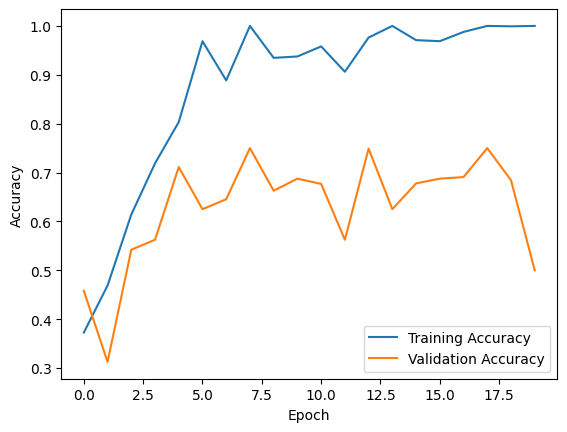

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Example prediction on a single image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './data/data/pullshot/pullshot100.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, 0)  # add batch dimension

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
labels = ['Drive','Flick','PullShot', 'Sweep']
print("Predicted Class:", labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: PullShot


In [14]:
# Example prediction on a single image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './data/data/drive/drives101.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, 0)  # add batch dimension

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
labels = ['Drive','Flick','PullShot', 'Sweep']
print("Predicted Class:", labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: Drive


In [12]:
# Example prediction on a single image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './data/data/legglance-flick/legglance1007.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, 0)  # add batch dimension

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
labels = ['Drive','Flick','PullShot', 'Sweep']
print("Predicted Class:", labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Class: Flick


In [15]:
# Example prediction on a single image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './data/datasweep/sweep1020.png'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, 0)  # add batch dimension

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
labels = ['Drive','Flick','PullShot', 'Sweep']
print("Predicted Class:", labels[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: Sweep
